# Data Analysis and Visualisation &mdash; Lab 06

## Problem 2

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from setuptools.command.rotate import rotate
from scipy import stats
import numpy as np

plt.style.use("ggplot")
plt.rcParams.update({
    "font.size": 12,
})

### Loading data

In [2]:
coffee_chains = ["Highlands+Coffee", "Phuc+Long+Coffee", "Starbucks"]
cities = ["Hanoi", "Ho+Chi+Minh+City"]

dfs = {}

for chain in coffee_chains:
    for city in cities:
        key = f"{chain}_{city}"
        path = f"../data/coffee-chains/{chain}_{city}.csv"

        df = pd.read_csv(path)

        group_cols = [col for col in df.columns if col != "info"]
        df = df.groupby(group_cols, as_index=False).first()

        dfs[key] = df

In [3]:
coffee_chains = ["Highlands+Coffee", "Phuc+Long+Coffee", "Starbucks"]

prices_df = {}

for chain in coffee_chains:
    price_df = pd.read_csv(f"../data/coffee-chains/{chain}+Prices.csv")
    prices_df[chain] = price_df

### Descriptive Statistics

**Explanation:**

Compute descriptive statistics of prices for each coffee chain in Ho Chi Minh City to understand typical price levels, spreads, and variability across brands.

In [4]:
for chain, price_df in prices_df.items():
    print(f"{chain.replace('+', ' ')}\n{'=' * len(chain)}")
    display(price_df.describe())

Highlands Coffee


,price
count,93.000000
mean,47473.118280
std,12722.447978
min,29000.000000
25%,39000.000000
50%,49000.000000
75%,55000.000000
max,75000.000000


Phuc Long Coffee


,price
count,105.000000
mean,53200.000000
std,10745.661021
min,20000.000000
25%,45000.000000
50%,55000.000000
75%,59000.000000
max,70000.000000


Starbucks


,price
count,73.000000
mean,71575.342466
std,18025.381648
min,30000.000000
25%,60000.000000
50%,70000.000000
75%,80000.000000
max,115000.000000


**Summary:**

* Highlands Coffee is the most affordable chain, with moderate variation around ~47,000 VND.
* Phuc Long is slightly more expensive, showing a tighter middle range (~53,000 VND).
* Starbucks is the priciest, with wide variability, reflecting its luxury positioning (~71,000 VND median, up to 115,000).

### Histogram

**Explanation:**

Visualize the distribution of menu prices for each coffee chain in Ho Chi Minh City to identify typical price ranges, peaks, and spread. Histograms with KDE show both density and potential multimodality.

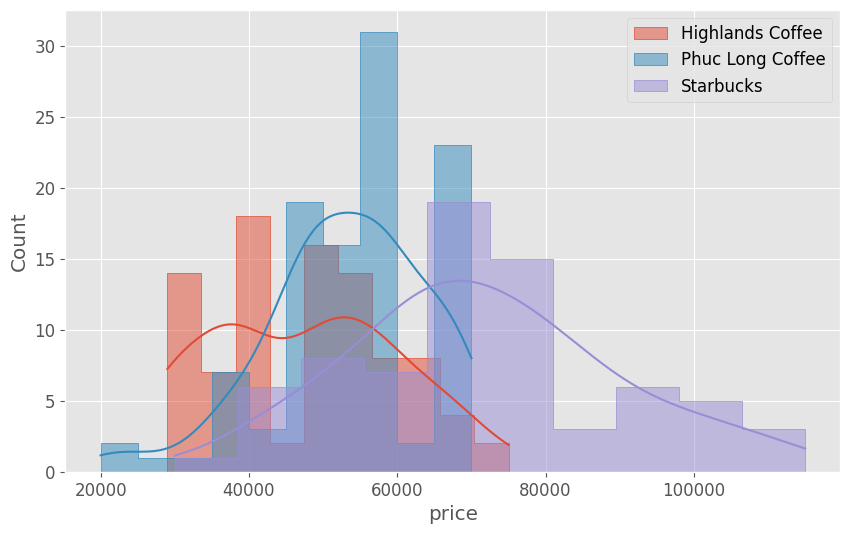

In [29]:
plt.figure(figsize=(10, 6))

for chain, price_df in prices_df.items():
    sns.histplot(
        price_df["price"], label=chain.replace("+", " "),
        bins=10, kde=True, element="step",
    )

plt.legend()

plt.show()

**Summary:**

* Phuc Long and Starbucks have roughly normal distributions, Highlands shows a bimodal pattern.
* Phuc Long and Highlands overlap in the mid-range, suggesting similar pricing tiers.
* Starbucks prices stretch higher, confirming its luxury/upper-tier positioning.

### Confidence Intervals

**Explanation:**

Compute the mean price and 95% confidence interval for medium-sized drinks across each coffee chain, providing an estimate of typical pricing and uncertainty.

In [6]:
size = "M"
confidence = 95

print(f"Size: {size}\n{'=' * 40}")

for chain, price_df in prices_df.items():
    size_filtered = price_df[price_df["size"] == size]
    prices = size_filtered["price"].dropna()

    n = len(prices)
    mean_price = prices.mean()
    std_price = prices.std()
    
    ci_upper, ci_lower = stats.t.interval(
        confidence=confidence / 100,
        df=n - 1,
        loc=mean_price,
        scale=std_price / np.sqrt(n),
    )
    
    print(f"({chain.replace('+', ' ')}) E[Price] = {mean_price:.2f}; {confidence}% CI = [{ci_upper:.2f}, {ci_lower:.2f}]")

Size: M
(Highlands Coffee) E[Price] = 50500.00; 95% CI = [46392.95, 54607.05]
(Phuc Long Coffee) E[Price] = 51590.91; 95% CI = [48920.00, 54261.82]
(Starbucks) E[Price] = 68518.52; 95% CI = [63526.29, 73510.74]


**Summary:**

* Highlands Coffee and Phuc Long have similar mid-range prices around 50,000&ndash;52,000 VND.
* Starbucks is notably higher at ~68,500k VND, reflecting its premium positioning.
* The confidence intervals indicate reasonable precision, slightly wider for Starbucks due to more price variability.

### Pearson Correlation Coefficient

Compute the Pearson correlation coefficient $r$ between the mean price and average rating of coffee chains in Ho Chi Minh City to see if higher prices align with better ratings.

In [7]:
city = "Ho+Chi+Minh+City"

avg_ratings = []
mean_prices = []

for chain in coffee_chains:
    avg_rating = dfs[f"{chain}_{city}"]["avg_rating"].mean()
    mean_price = prices_df[chain]["price"].mean()

    avg_ratings.append(avg_rating)
    mean_prices.append(mean_price)

corr, p_value = stats.pearsonr(avg_ratings, mean_prices)
print(f"r: {corr:.2f}, p-value: {p_value:.3f}")

r: 0.74, p-value: 0.468


**Summary:**

$r = 0.74$ is moderately high, but $\text{p–value} = 0.468$ is not significant.

$\Rightarrow$ Suggests a positive trend between price and rating, but the sample size is too small to confirm a reliable relationship.

### Avg. Rating by Price Scatterplot

**Explanation:**

Visualizes the relationship between each chain's average price and its average customer rating; By placing both metrics on the same axes, we can quickly assess whether higher-priced chains tend to receive better ratings, and identify which chains deviate from that general pattern.

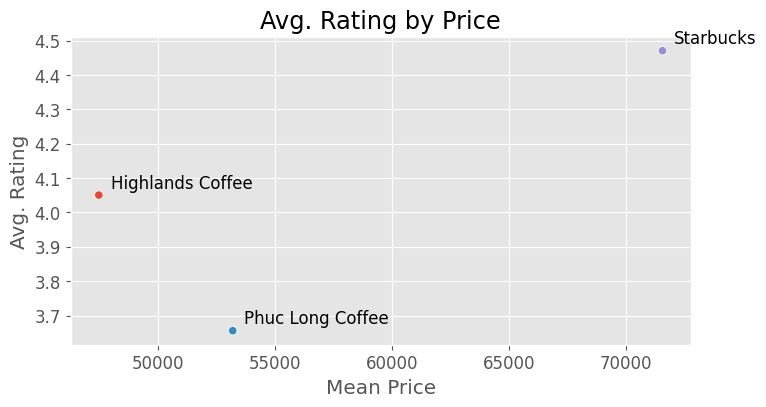

In [28]:
plt.figure(figsize=(8, 4))

colours = ["#c45a32", "#00b57d", "#7e57c2"]

sns.scatterplot(x=mean_prices, y=avg_ratings, hue=colours, legend=False)

for i, chain in enumerate(coffee_chains):
    plt.text(mean_prices[i] + 500, avg_ratings[i] + 0.02, chain.replace("+", " "))

plt.title("Avg. Rating by Price")

plt.xlabel("Mean Price")
plt.ylabel("Avg. Rating")

plt.show()

**Summary:**

* Highlands has the lowest mean price (\~47,000 VND) with a moderate average rating (\~4.1).
* Phuc Long is slightly more expensive (\~52,000 VND) but shows the lowest rating (\~3.6), suggesting weaker perceived value.
* Starbucks is the most expensive (\~73,000 VND) yet achieves the highest rating (\~4.5), indicating customers are generally satisfied despite the premium.

Overall, there is a loosely positive association between higher prices and higher ratings, though Phuc Long deviates from this pattern.